In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import random 
import time 
from mpl_toolkits.mplot3d import Axes3D 

### 1. 


### $H_0: p = 0,01$ 

### $H_1: p > 0,01$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [2]:
α = 0.05 
p0 = 0.01 
z_α = stats.norm.ppf(0.95, 0, 1)
z_α 

1.6448536269514722

In [3]:
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

[  30   50  100  200  500 1000]
[0.012 0.015 0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1  ]


### norm 0.01

In [4]:
st = time.time() 

powers_total_norm_01 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_01 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 5.234766244888306 seconds


<IPython.core.display.Javascript object>


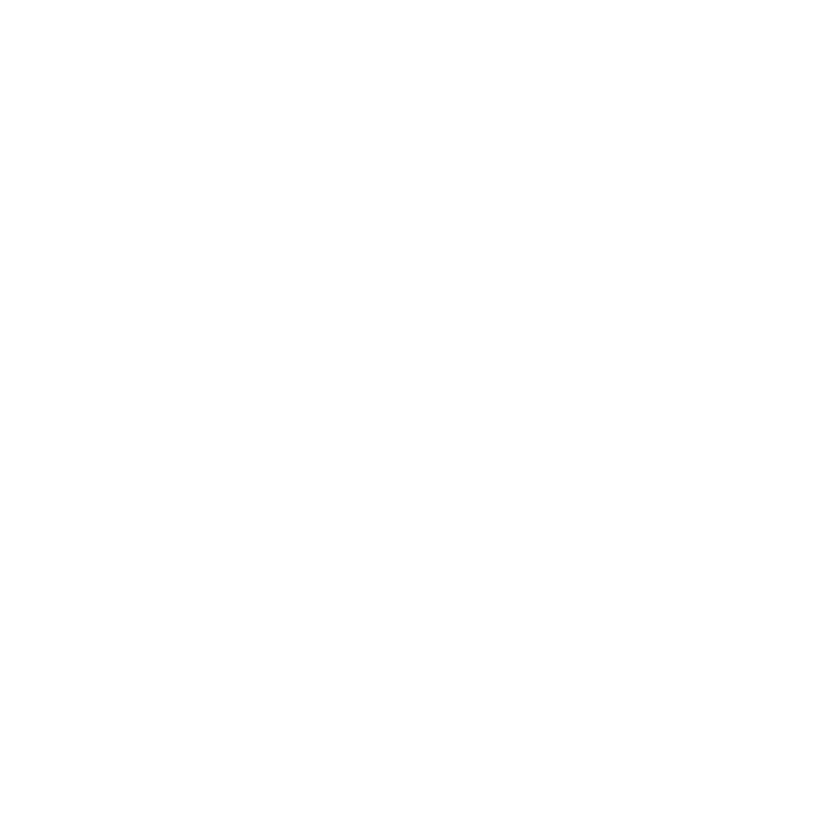

In [5]:
%matplotlib notebook

n_mesh_norm_01, p1_mesh_norm_01 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_01 = np.array(powers_total_norm_01).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_01, p1_mesh_norm_01, powers_mesh_norm_01, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### arcsin 0.01

In [6]:
st = time.time() 

powers_total_arcsin_01 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_01 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 5.160590887069702 seconds


<IPython.core.display.Javascript object>


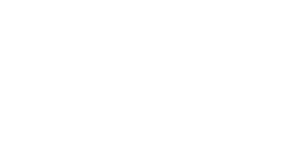

In [7]:
%matplotlib notebook

n_mesh_arcsin_01, p1_mesh_arcsin_01 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_arcsin_01 = np.array(powers_total_arcsin_01).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_arcsin_01, p1_mesh_arcsin_01, powers_mesh_arcsin_01, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

In [12]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.style"] = "normal"

### difference 0.01

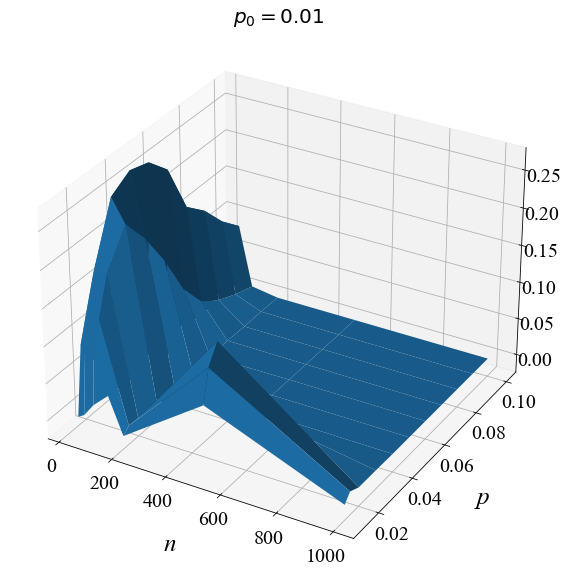

In [13]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_01, p1_mesh_norm_01, powers_mesh_norm_01 - powers_mesh_arcsin_01, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.01$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 2. 


### $H_0: p = 0,02$ 

### $H_1: p > 0,02$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [14]:
α = 0.05 
p0 = 0.02 
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.022 0.025 0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11 ]


### norm 0.02

In [15]:
st = time.time() 

powers_total_norm_02 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_02 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 5.356226682662964 seconds


<IPython.core.display.Javascript object>


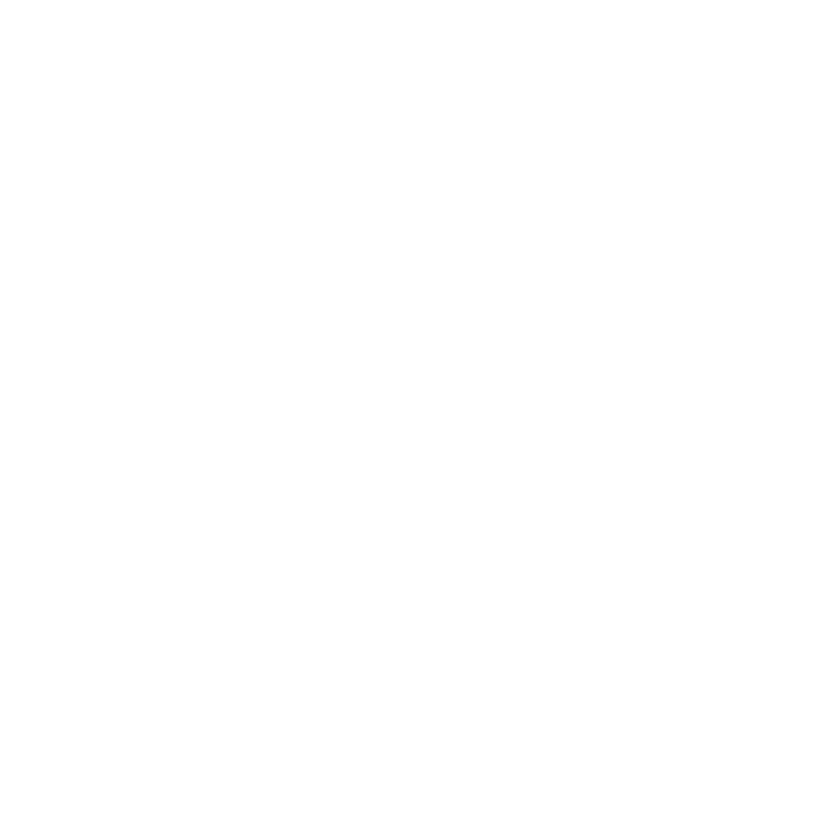

In [16]:
%matplotlib notebook

n_mesh_norm_02, p1_mesh_norm_02 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_02 = np.array(powers_total_norm_02).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_02, p1_mesh_norm_02, powers_mesh_norm_02, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### arcsin 0.02

In [17]:
st = time.time() 

powers_total_arcsin_02 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_02 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 5.405653953552246 seconds


<IPython.core.display.Javascript object>


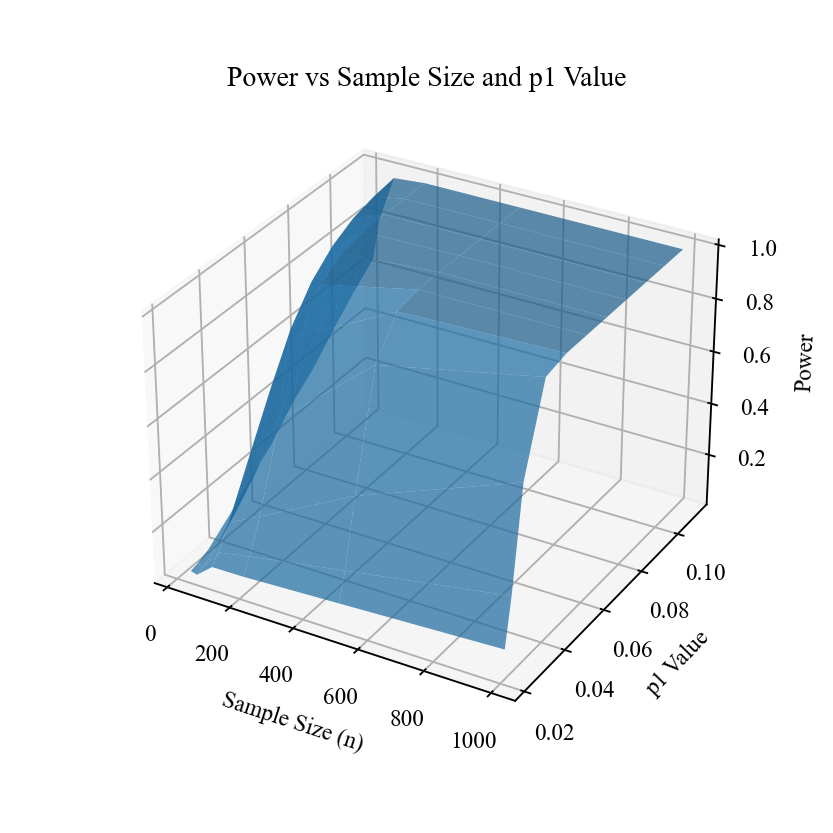

In [18]:
%matplotlib notebook

n_mesh_arcsin_02, p1_mesh_arcsin_02 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_arcsin_02 = np.array(powers_total_arcsin_02).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_arcsin_02, p1_mesh_arcsin_02, powers_mesh_arcsin_02, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### difference 0.02

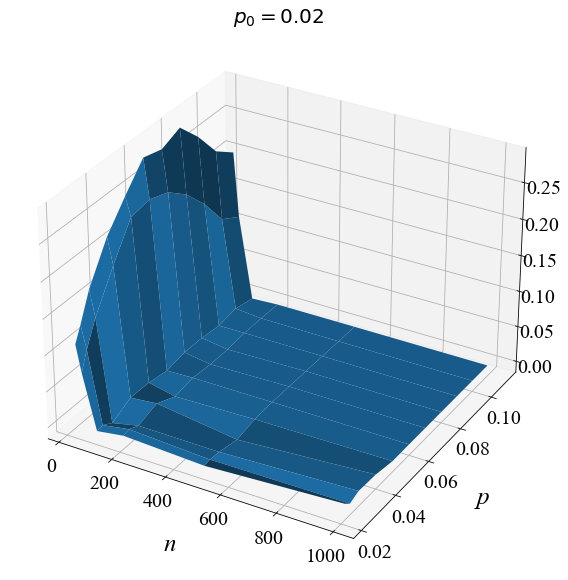

In [19]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_02, p1_mesh_norm_02, powers_mesh_norm_02 - powers_mesh_arcsin_02, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.02$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 3. 


### $H_0: p = 0,03$ 

### $H_1: p > 0,03$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [20]:
α = 0.05 
p0 = 0.03 
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.032 0.035 0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12 ]


### norm 0.03

In [21]:
st = time.time() 

powers_total_norm_03 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_03 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 5.982317686080933 seconds


<IPython.core.display.Javascript object>


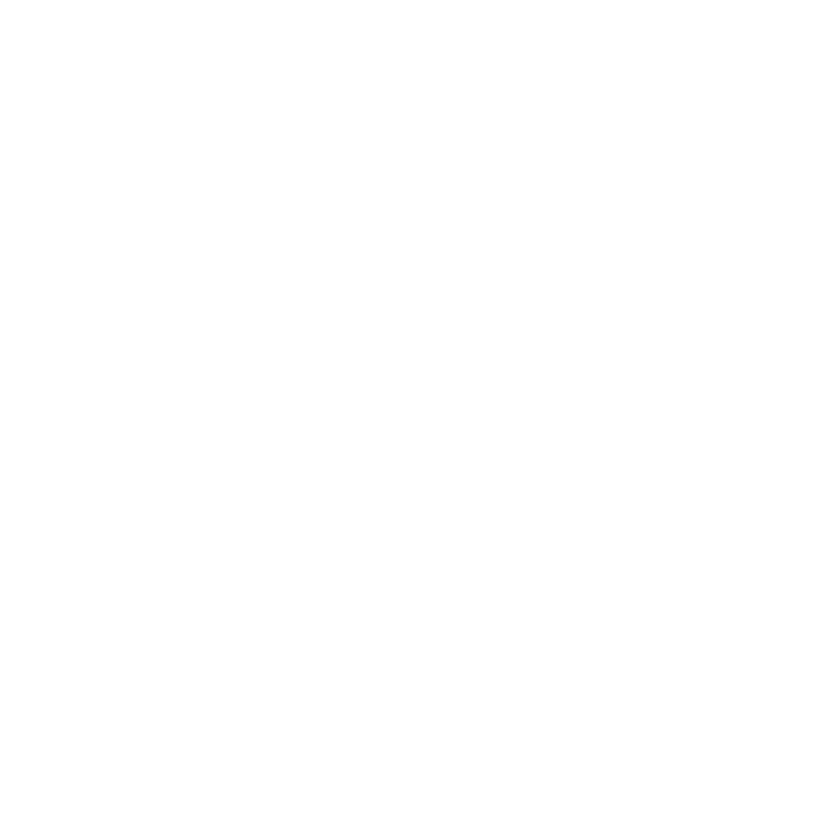

In [22]:
%matplotlib notebook

n_mesh_norm_03, p1_mesh_norm_03 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_03 = np.array(powers_total_norm_03).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_03, p1_mesh_norm_03, powers_mesh_norm_03, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### arcsin 0.03

In [23]:
st = time.time() 

powers_total_arcsin_03 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_03 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 5.812584161758423 seconds


<IPython.core.display.Javascript object>


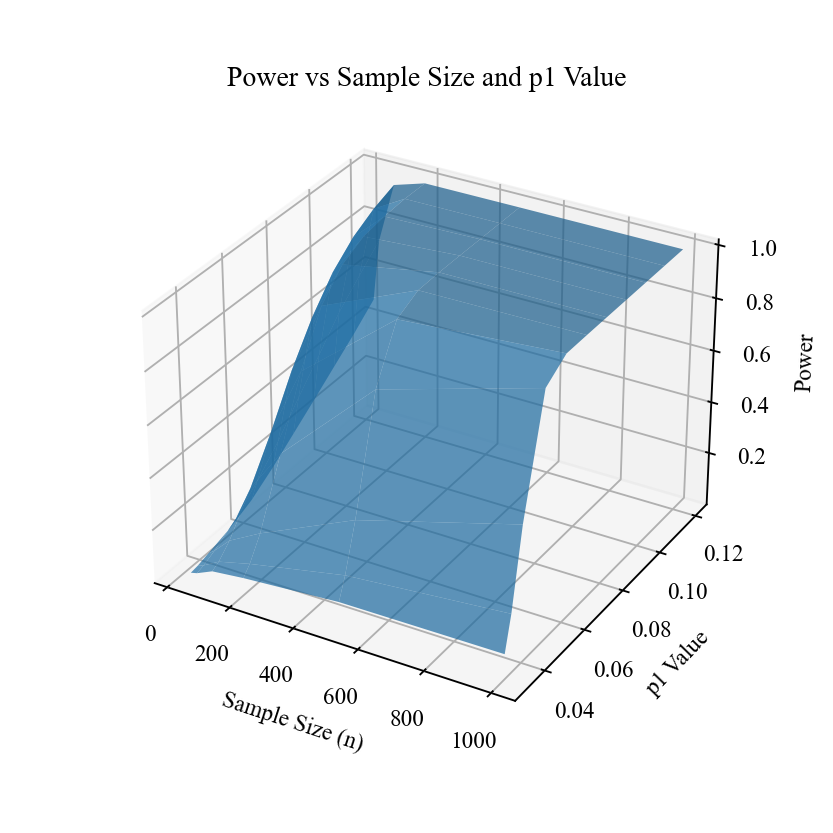

In [24]:
%matplotlib notebook

n_mesh_arcsin_03, p1_mesh_arcsin_03 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_arcsin_03 = np.array(powers_total_arcsin_03).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_arcsin_03, p1_mesh_arcsin_03, powers_mesh_arcsin_03, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### difference 0.03

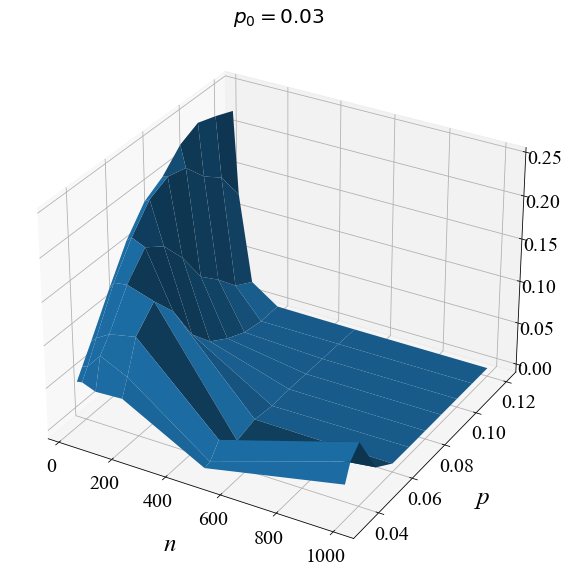

In [25]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_03, p1_mesh_norm_03, powers_mesh_norm_03 - powers_mesh_arcsin_03, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.03$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 4. 


### $H_0: p = 0,04$ 

### $H_1: p > 0,04$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [26]:
α = 0.05 
p0 = 0.04 
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.042 0.045 0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12  0.13 ]


### norm 0.04 

In [27]:
st = time.time() 

powers_total_norm_04 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_04 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.138427495956421 seconds


<IPython.core.display.Javascript object>


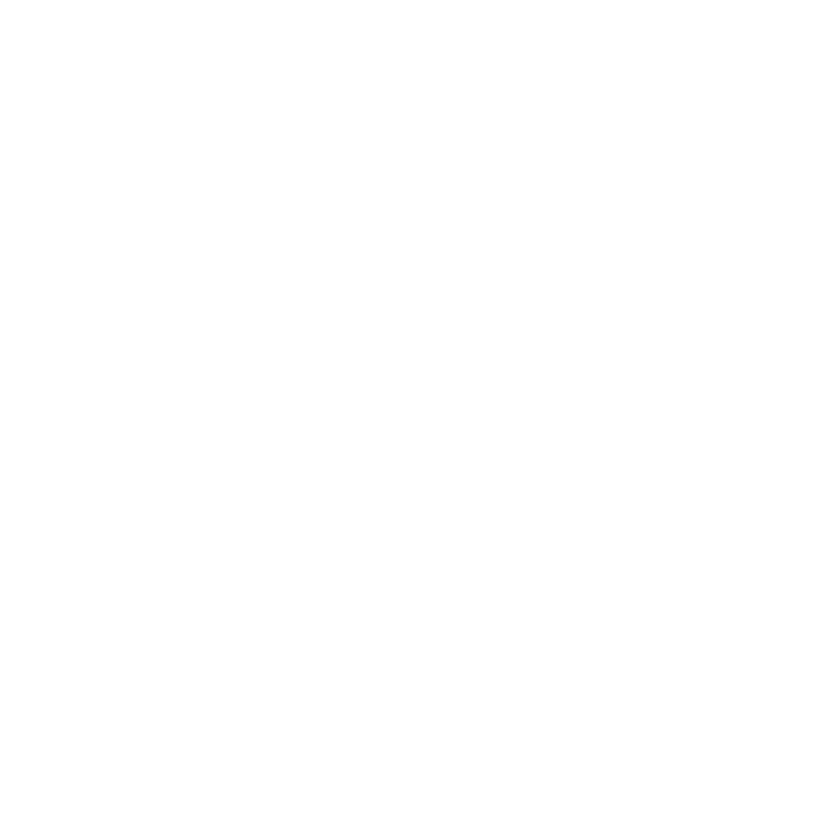

In [28]:
%matplotlib notebook

n_mesh_norm_04, p1_mesh_norm_04 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_04 = np.array(powers_total_norm_04).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_04, p1_mesh_norm_04, powers_mesh_norm_04, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### arcsin 0.04 

In [29]:
st = time.time() 

powers_total_arcsin_04 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_04 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 5.836951732635498 seconds


<IPython.core.display.Javascript object>


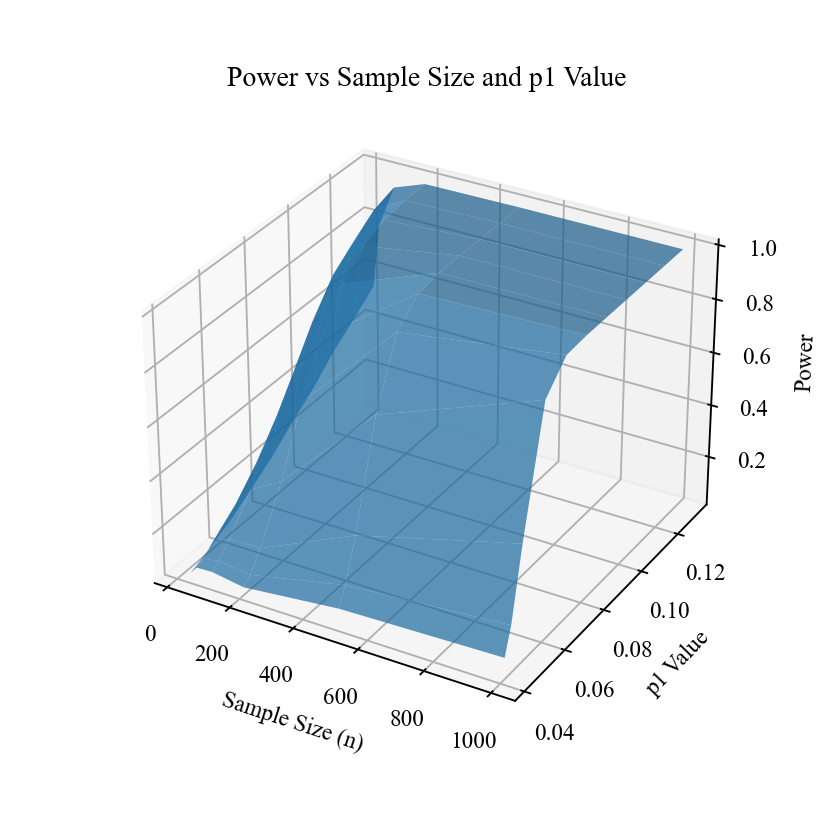

In [30]:
%matplotlib notebook

n_mesh_arcsin_04, p1_mesh_arcsin_04 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_arcsin_04 = np.array(powers_total_arcsin_04).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_arcsin_04, p1_mesh_arcsin_04, powers_mesh_arcsin_04, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### difference 0.04

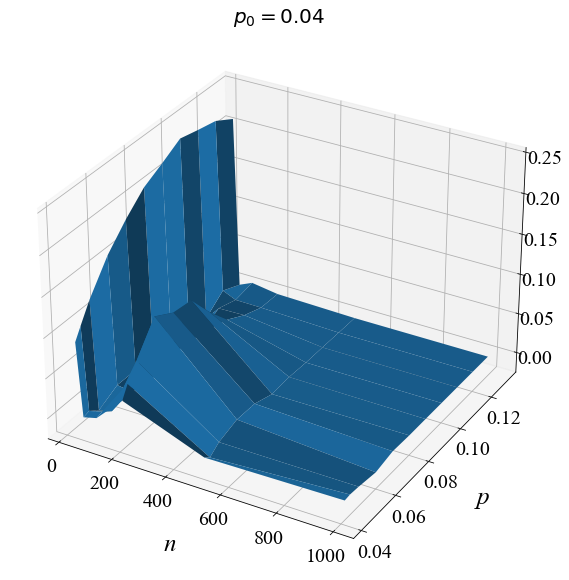

In [31]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_04, p1_mesh_norm_04, powers_mesh_norm_04 - powers_mesh_arcsin_04, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.04$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 5. 


### $H_0: p = 0,05$ 

### $H_1: p > 0,05$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [32]:
α = 0.05 
p0 = 0.05 
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.052 0.055 0.06  0.07  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15 ]


In [33]:
st = time.time() 

powers_total_norm_05 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_05 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.6479332447052 seconds


<IPython.core.display.Javascript object>


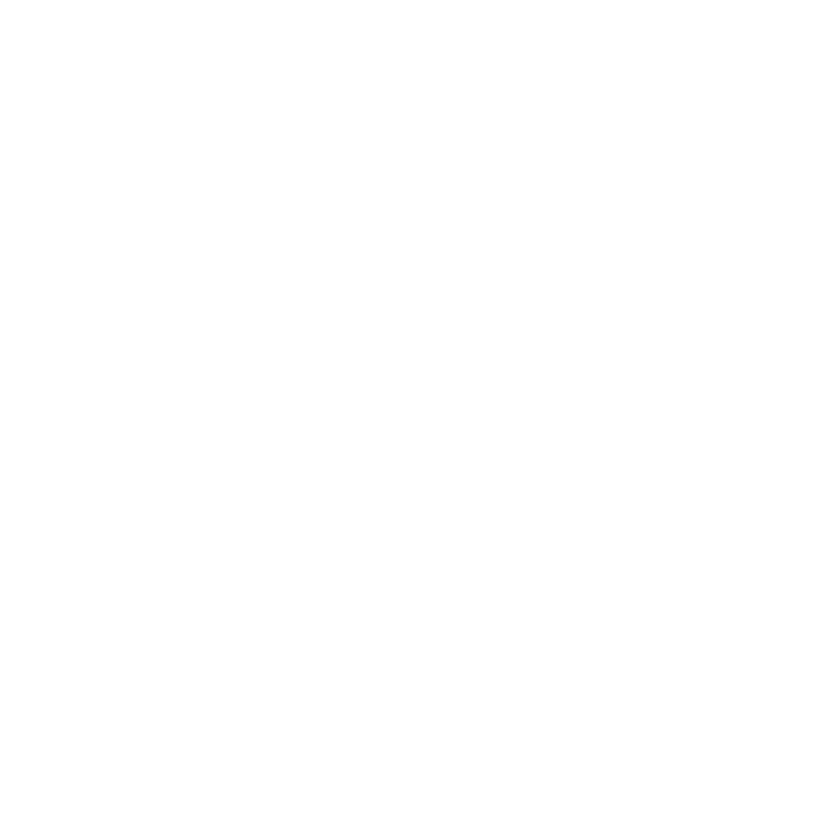

In [34]:
%matplotlib notebook

n_mesh_norm_05, p1_mesh_norm_05 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_05 = np.array(powers_total_norm_05).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_05, p1_mesh_norm_05, powers_mesh_norm_05, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### arcsin 0.05

In [35]:
st = time.time() 

powers_total_arcsin_05 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_05 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.621118783950806 seconds


<IPython.core.display.Javascript object>


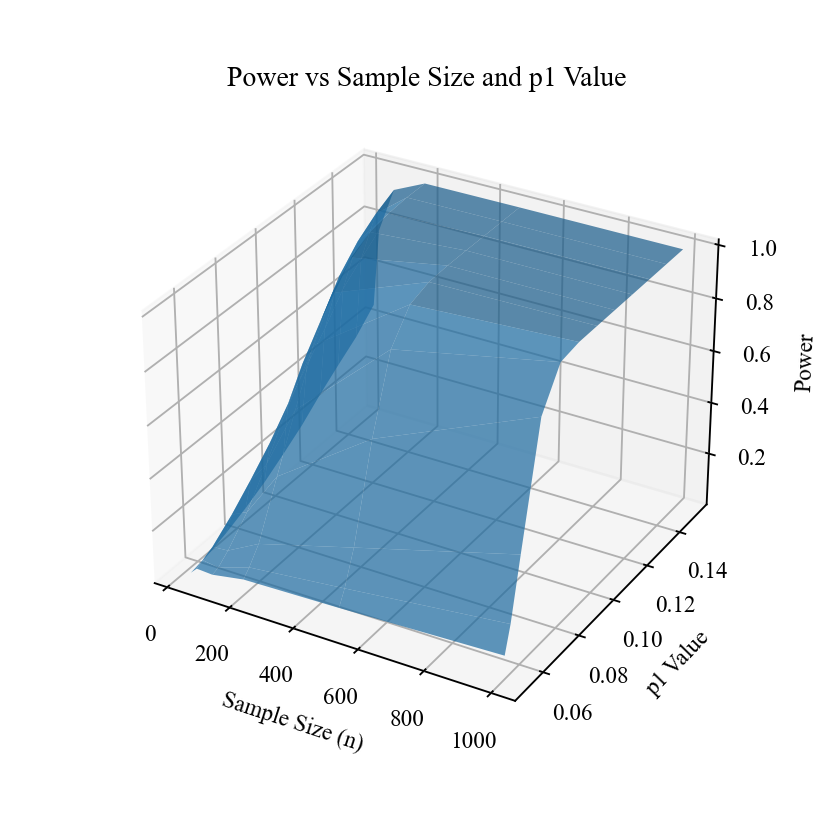

In [36]:
%matplotlib notebook

n_mesh_arcsin_05, p1_mesh_arcsin_05 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_arcsin_05 = np.array(powers_total_arcsin_05).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_arcsin_05, p1_mesh_arcsin_05, powers_mesh_arcsin_05, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### difference 0.05

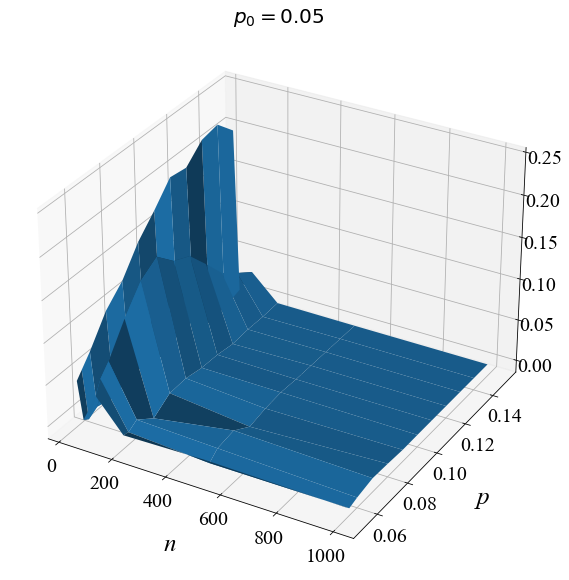

In [37]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_05, p1_mesh_norm_05, powers_mesh_norm_05 - powers_mesh_arcsin_05, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.05$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)
plt.show()

### 6. 


### $H_0: p = 0,06$ 

### $H_1: p > 0,06$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [38]:
α = 0.05 
p0 = 0.06
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.062 0.065 0.07  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15 ]


### norm 0.06

In [39]:
st = time.time() 

powers_total_norm_06 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_06 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.200069189071655 seconds


<IPython.core.display.Javascript object>


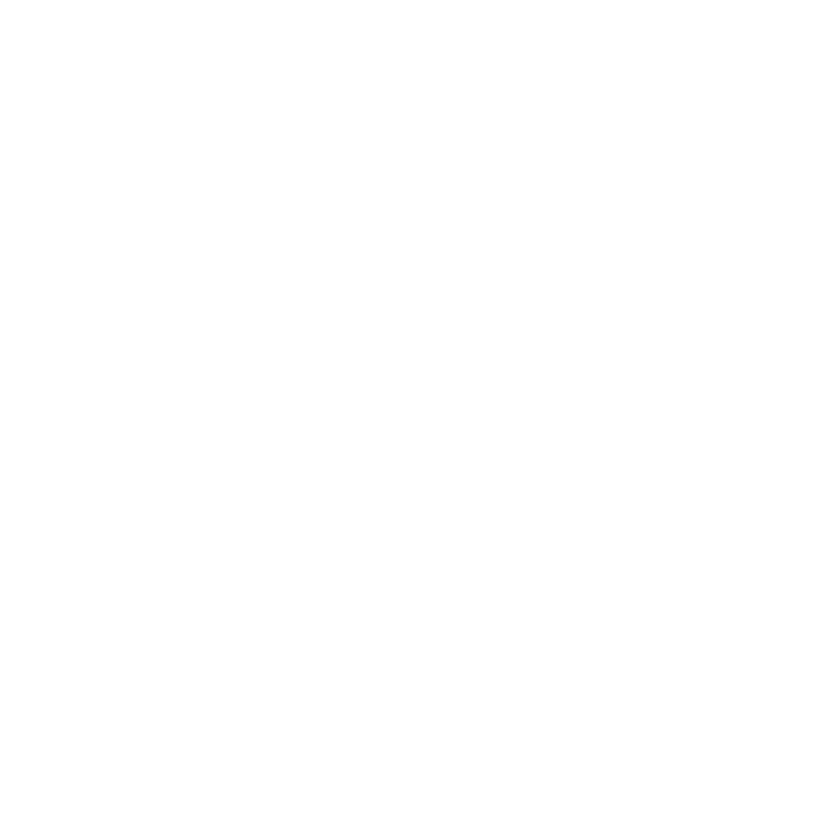

In [40]:
%matplotlib notebook

n_mesh_norm_06, p1_mesh_norm_06 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_06 = np.array(powers_total_norm_06).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_06, p1_mesh_norm_06, powers_mesh_norm_06, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### arcsin 0.06

In [41]:
st = time.time() 

powers_total_arcsin_06 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_06 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.171238422393799 seconds


<IPython.core.display.Javascript object>


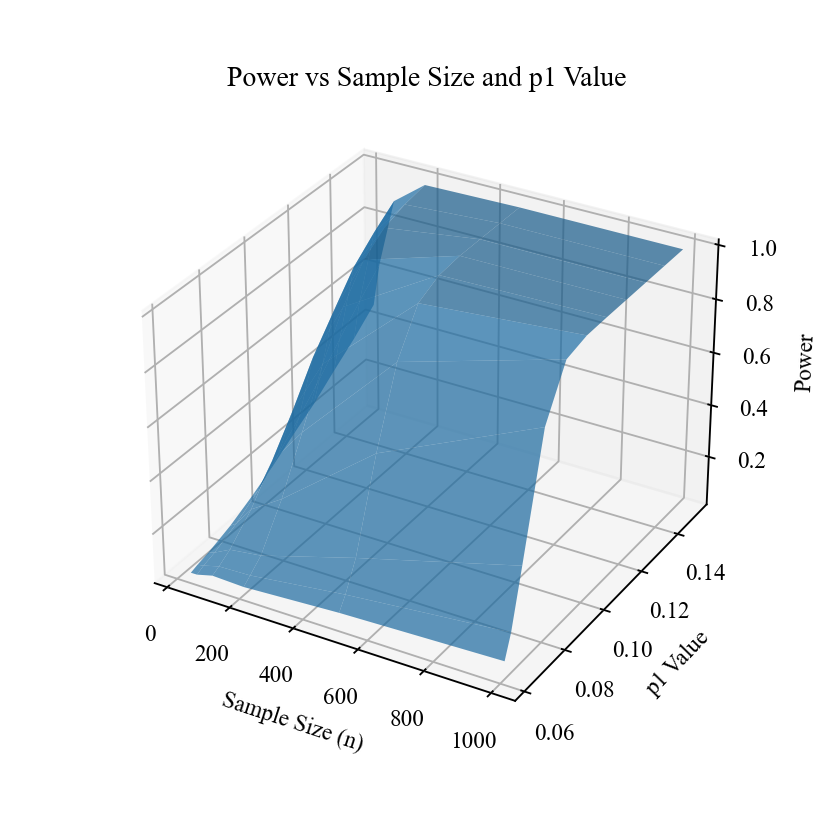

In [42]:
%matplotlib notebook

n_mesh_arcsin_06, p1_mesh_arcsin_06 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_arcsin_06 = np.array(powers_total_arcsin_06).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_arcsin_06, p1_mesh_arcsin_06, powers_mesh_arcsin_06, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### difference 0.06

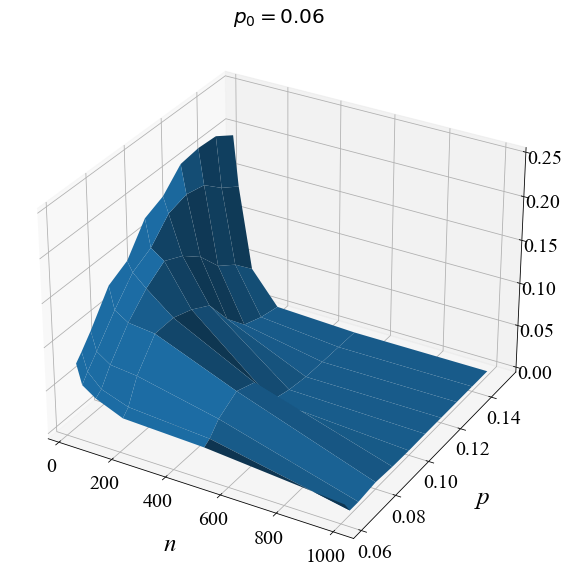

In [45]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_06, p1_mesh_norm_06, powers_mesh_norm_06 - powers_mesh_arcsin_06, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.06$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 10. 


### $H_0: p = 0,1$ 

### $H_1: p > 0,1$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [46]:
α = 0.05 
p0 = 0.1
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.102 0.105 0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19 ]


### norm 0.1

In [47]:
st = time.time() 

powers_total_norm_1 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_1 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.641490697860718 seconds


In [48]:
n_mesh_norm_1, p1_mesh_norm_1 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_norm_1 = np.array(powers_total_norm_1).reshape(len(p1s), len(sample_sizes)) 

### arcsin 0.1

In [49]:
st = time.time() 

powers_total_arcsin_1 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_1 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.816650867462158 seconds


In [50]:
n_mesh_arcsin_1, p1_mesh_arcsin_1 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_arcsin_1 = np.array(powers_total_arcsin_1).reshape(len(p1s), len(sample_sizes)) 

### difference 0.1

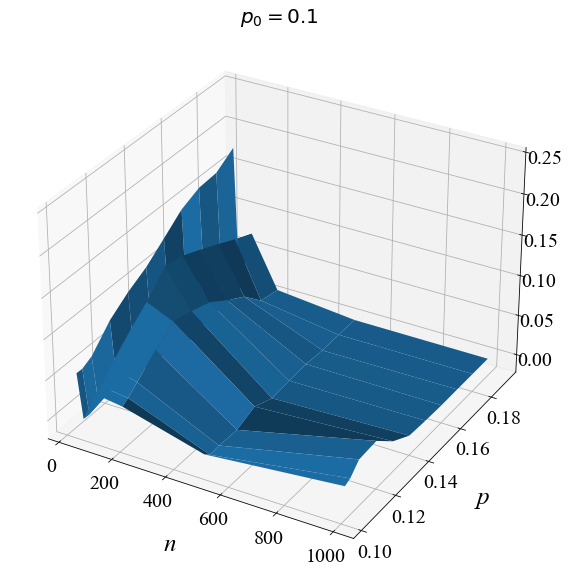

In [51]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_1, p1_mesh_norm_1, powers_mesh_norm_1 - powers_mesh_arcsin_1, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.1$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 15. 


### $H_0: p = 0,15$ 

### $H_1: p > 0,15$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [55]:
α = 0.05 
p0 = 0.15
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.152 0.155 0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23  0.24 ]


### norm 0.15

In [56]:
st = time.time() 

powers_total_norm_15 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_15 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 3.139958620071411 seconds


In [57]:
n_mesh_norm_15, p1_mesh_norm_15 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_norm_15 = np.array(powers_total_norm_15).reshape(len(p1s), len(sample_sizes)) 

### arcsin 0.15

In [58]:
st = time.time() 

powers_total_arcsin_15 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_15 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 3.102415084838867 seconds


In [59]:
n_mesh_arcsin_15, p1_mesh_arcsin_15 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_arcsin_15 = np.array(powers_total_arcsin_15).reshape(len(p1s), len(sample_sizes)) 

### dfference 0.15

<IPython.core.display.Javascript object>


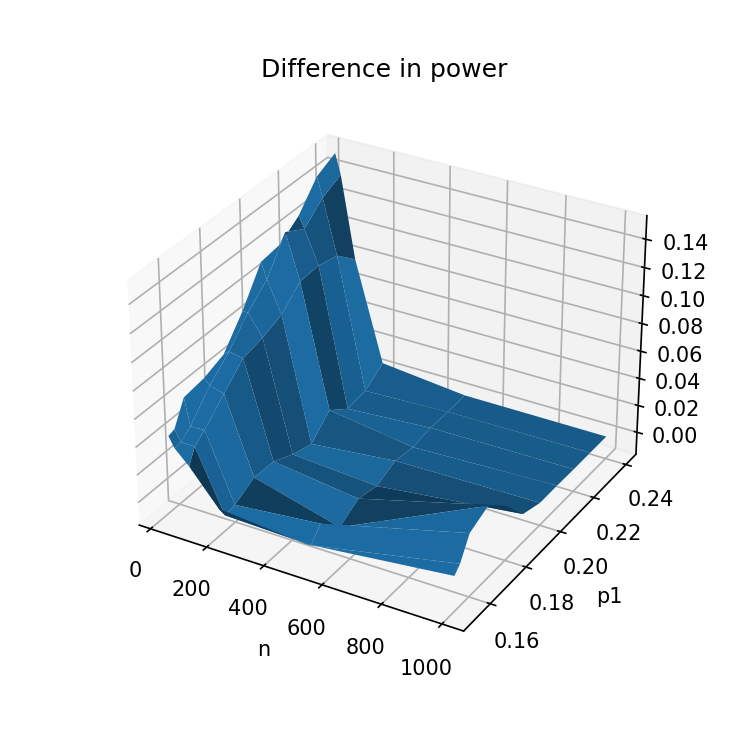

In [60]:
%matplotlib notebook
#%matplotlib inline

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_15, p1_mesh_norm_15, powers_mesh_norm_15 - powers_mesh_arcsin_15, color = 'tab:blue', alpha = 1) 

ax.set_xlabel('n')
ax.set_ylabel('p1')
#ax.set_zlabel('')
ax.set_title('Difference in power')

#ax.view_init(elev=30, azim=40)

plt.show()

### 20. 


### $H_0: p = 0,2$ 

### $H_1: p > 0,2$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [52]:
α = 0.05 
p0 = 0.2 
z_α = stats.norm.ppf(0.95, 0, 1)
z_α 

1.6448536269514722

In [53]:
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

[  30   50  100  200  500 1000]
[0.202 0.205 0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3  ]


### norm 0.2

In [54]:
st = time.time() 

powers_total_norm_2 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_2 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 8.156904458999634 seconds


<IPython.core.display.Javascript object>


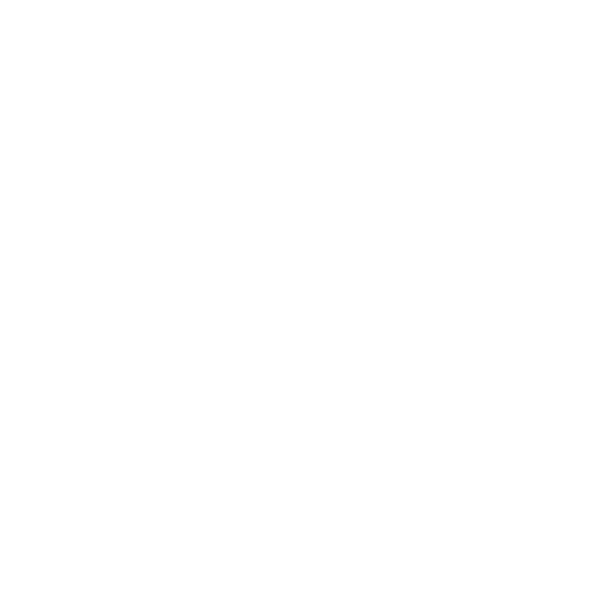

In [55]:
%matplotlib notebook

n_mesh_norm_2, p1_mesh_norm_2 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_2 = np.array(powers_total_norm_2).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_2, p1_mesh_norm_2, powers_mesh_norm_2, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### arcsin 0.2

In [56]:
st = time.time() 

powers_total_arcsin_2 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_2 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 8.158583641052246 seconds


<IPython.core.display.Javascript object>


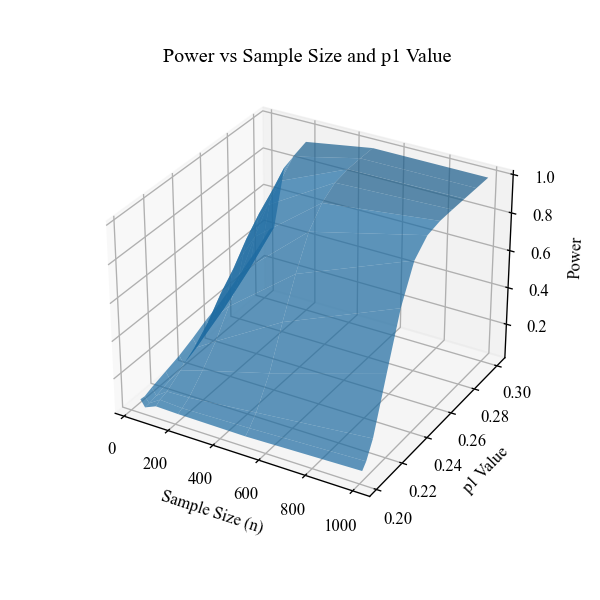

In [57]:
%matplotlib notebook

n_mesh_arcsin_2, p1_mesh_arcsin_2 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_arcsin_2 = np.array(powers_total_arcsin_2).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_arcsin_2, p1_mesh_arcsin_2, powers_mesh_arcsin_2, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### difference 0.2

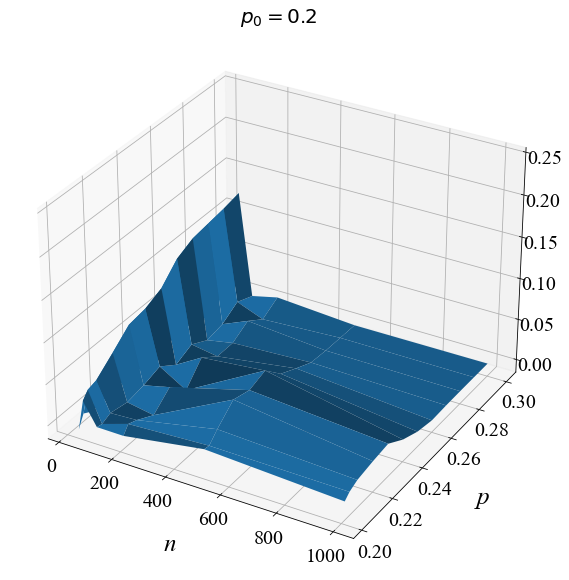

In [58]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_2, p1_mesh_norm_2, powers_mesh_norm_2 - powers_mesh_arcsin_2, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.2$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()